## Notebook (Google Colab) for Fine-Tuning of DiltilGPT2 for CLM of Taylor Swift Lyrics

- It used NVIDIA T4 GPU for fine-tuning.
- CLM: Causal Langage Modelling
- Objective: after training (fine-tuning) use model to complete lyrics from 2 or 3 verses

In [1]:
### install needed packages (if not already in Colab Notebook)

In [2]:
!apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (84.2 kB/s)
Selecting previously unselected package tree.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [3]:
!pip install transformers
!pip install datasets
!pip install accelerate -U
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 101.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 2.0 MB/s eta 0:00:00


In [4]:
### Mount Google Drive file system
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Show path to dataset (within  the Google Drive file system)

- also shows one of the songs in the dataset



In [5]:
# go to project folder -- taylor swift albums
!tree -L 1 /content/gdrive/MyDrive/projects_work_single/taylor_swift_albums/taylor_swift_data/

/content/gdrive/MyDrive/projects_work_single/taylor_swift_albums/taylor_swift_data/
├── Albums
├── Albums.csv
├── Cover_Art
└── Tabular

3 directories, 1 file


In [6]:
!cat /content/gdrive/MyDrive/projects_work_single/taylor_swift_albums/taylor_swift_data/Albums/Fearless/Breathe.txt

48 ContributorsTranslationsPortuguêsBreathe Lyrics[Verse 1: Taylor Swift]
I see your face in my mind as I drive away
'Cause none of us thought it was gonna end that way
People are people and sometimes, we change our minds
But it's killing me to see you go after all this time

[Verse 2: Taylor Swift with Colbie Caillat]
Music starts playing like the end of a sad movie
It's the kind of ending you don't really wanna see
'Cause it's tragedy and it'll only bring you down
Now, I don't know what to be without you around

[Pre-Chorus: Taylor Swift with Colbie Caillat]
And we know it's never simple, never easy
Never a clean break, no one here to save me
You're the only thing I know like the back of my hand

[Chorus: Taylor Swift with Colbie Caillat]
And I can't breathe without you, but I have to
Breathe without you, but I have to

[Verse 3: Taylor Swift with Colbie Caillat]
Never wanted this, never wanna see you hurt
Every little bump in the road, I tried to swerve
But people are people and som

### Define paths for the project (using a Google COLAB notebook)

In [7]:
PATH_PROJECT = "/content/gdrive/MyDrive/projects_work_single/taylor_swift_albums/"
PATH_DATA = "/content/gdrive/MyDrive/projects_work_single/taylor_swift_albums/" + "taylor_swift_data/"
PATH_TRACKS = PATH_DATA + "Tabular/"
PATH_ALBUM = PATH_DATA + "Albums/"

In [8]:
print(PATH_PROJECT)
print(PATH_DATA)
print(PATH_TRACKS)
print(PATH_ALBUM)

/content/gdrive/MyDrive/projects_work_single/taylor_swift_albums/
/content/gdrive/MyDrive/projects_work_single/taylor_swift_albums/taylor_swift_data/
/content/gdrive/MyDrive/projects_work_single/taylor_swift_albums/taylor_swift_data/Tabular/
/content/gdrive/MyDrive/projects_work_single/taylor_swift_albums/taylor_swift_data/Albums/


In [9]:
PATH_TO_PROJECT_CODE = "/content/gdrive/MyDrive/projects_work_single/taylor_swift_albums/distilgpt2_taylor_experiments_2023/generator_taylor_swift_lyrics"
PATH_EXPERIMENTS = "/content/gdrive/MyDrive/projects_work_single/taylor_swift_albums/distilgpt2_taylor_experiments_2023/"

In [10]:
import sys
# appending path to project code
sys.path.append(PATH_TO_PROJECT_CODE)

### Show project code folder

In [11]:
!tree /content/gdrive/MyDrive/projects_work_single/taylor_swift_albums/distilgpt2_taylor_experiments_2023/generator_taylor_swift_lyrics

/content/gdrive/MyDrive/projects_work_single/taylor_swift_albums/distilgpt2_taylor_experiments_2023/generator_taylor_swift_lyrics
├── data_preprocess.py
├── data_tokenization.py
├── generate_lyrics.py
├── __pycache__
│   ├── data_tokenization.cpython-310.pyc
│   └── train_model.cpython-310.pyc
└── train_model.py

1 directory, 6 files


## Preprocess Dataset

- Compacted into a function as Exploratory Data Analysis already done previously.
- Saves to .json file a pandas DataFrame with entire dataset (except album image paths). The name of file is "postproc_dataset_ts_lyrics.json".
- Some Albums don't have corresponding track lyrics, they will be dropped from dataset.
- Format removes start and end tokens for each song, but keeps everyting else.
- It has albums, tracks of albums, and for each track its lyric (song).

In [12]:
%run {PATH_TO_PROJECT_CODE}/data_preprocess.py --path-data {PATH_DATA} --path-save {PATH_EXPERIMENTS}

/content/gdrive/MyDrive/projects_work_single/taylor_swift_albums/taylor_swift_data/Albums/Midnights_TheLateNightEdition_/Anti_Hero.txt
/content/gdrive/MyDrive/projects_work_single/taylor_swift_albums/taylor_swift_data/Albums/Midnights_TheLateNightEdition_/SnowOnTheBeach.txt
/content/gdrive/MyDrive/projects_work_single/taylor_swift_albums/taylor_swift_data/Albums/Midnights_TheLateNightEdition_/YoureOnYourOwn_Kid.txt
/content/gdrive/MyDrive/projects_work_single/taylor_swift_albums/taylor_swift_data/Albums/Midnights_TheLateNightEdition_/MidnightRain.txt
/content/gdrive/MyDrive/projects_work_single/taylor_swift_albums/taylor_swift_data/Albums/Midnights_TheLateNightEdition_/Question____.txt
/content/gdrive/MyDrive/projects_work_single/taylor_swift_albums/taylor_swift_data/Albums/Midnights_TheLateNightEdition_/VigilanteShit.txt
/content/gdrive/MyDrive/projects_work_single/taylor_swift_albums/taylor_swift_data/Albums/Midnights_TheLateNightEdition_/Bejeweled.txt
/content/gdrive/MyDrive/project

In [13]:
#!cat /content/gdrive/MyDrive/projects_work_single/taylor_swift_albums/distilgpt2_taylor_experiments_2023/generator_taylor_swift_lyrics/data_preprocess.py

## Create TokenizedDataset Object

- It contains HuggingFace dataset representation (train and test) - one with context window applied, other without.
- It applies a specific context window that might be needed (e.g. due to memory constraints)
- It contains original dataset (all except album images) in a pd.DataFrame
- It contains the HF Tokenizer object used (depends on the model)
- Here we will be using DistilGPT2 as it's low memory and fits into a T4 GPU; due to less parameters than GPT2 it is faster to train.

In [14]:
from data_tokenization import TokenizedDataset
from train_model import train_causal_lang_model
from train_model import compute_perplexity
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
taylor_lyrics_data_object = TokenizedDataset(path_to_dataset=PATH_EXPERIMENTS + "postproc_dataset_ts_lyrics.json", test_size_ratio=0.2, model_type="distilgpt2", block_size=1024)

Map:   0%|          | 0/424 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1745 > 1024). Running this sequence through the model will result in indexing errors


Map:   0%|          | 0/107 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/424 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/107 [00:00<?, ? examples/s]

## Call training of causal language model (reuses TokenizedDataset object)

- for now uses hard-coded hyper-parameters for use in T4 GPU.
- check `train_model.py` for the hyper-parameter values used in TrainerArguments class of HF framework.

In [16]:
PATH_TO_DATASET_PREPROCESSED = PATH_EXPERIMENTS + "postproc_dataset_ts_lyrics.json"

In [17]:
# %run {PATH_TO_PROJECT_CODE}/train_model.py --path-project {PATH_PROJECT} --folder-to-save "distilgpt2_taylor_experiments_2023/" --path-to-dataset {PATH_TO_DATASET_PREPROCESSED} --model-type "distilgpt2" --block-size 1024 --test-size 0.2 --save-model

In [18]:

trained_tuple = train_causal_lang_model(
                  path_project=PATH_PROJECT,
                  folder_to_save="distilgpt2_taylor_experiments_2023/",
                  model_type="distilgpt2",
                  tokenized_dataset_obj=taylor_lyrics_data_object,
                  block_size=1024,
                  test_size=0.2,
                  save_model=True
                  )

# path_to_dataset=PATH_TO_DATASET_PREPROCESSED,

Step,Training Loss,Validation Loss
10,3.117900,2.683905
20,3.080500,2.625965
30,2.944000,2.558381
40,2.919000,2.485626
50,2.793900,2.427027
60,2.782200,2.372462
70,2.681500,2.322625
80,2.623500,2.276546
90,2.551700,2.233815
100,2.500400,2.206198


In [19]:
model, trainer, data_obj, (metrics_train, metrics_eval) = trained_tuple

In [20]:
print(model)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-5): 6 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)


## Check Final Metrics

In [21]:
df_logged_info = pd.DataFrame(trainer.state.log_history)

In [22]:
#df_logged_info

In [23]:
trace_train_loss = df_logged_info["loss"].dropna().reset_index(drop=True)
trace_eval_loss = df_logged_info["eval_loss"].dropna().reset_index(drop=True)[:-1]

--- Train and Test Set Losses (Negative Log-Likelihood) ---


<Axes: >

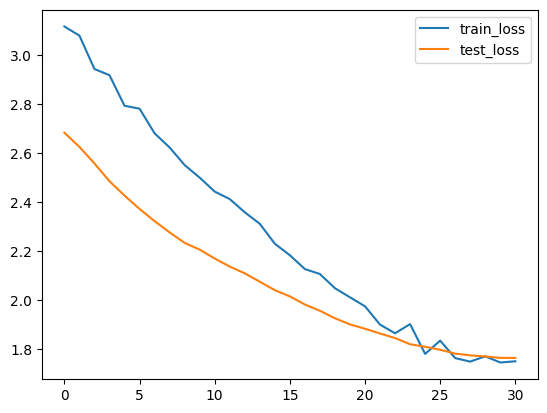

In [24]:
print("--- Train and Test Set Losses (Negative Log-Likelihood) ---")
pd.DataFrame.from_dict({"train_loss": trace_train_loss, "test_loss": trace_eval_loss}).plot.line()

### Final Train Set Metics

In [25]:
metrics_train

{'train_runtime': 2383.8522,
 'train_samples_per_second': 4.361,
 'train_steps_per_second': 0.132,
 'total_flos': 2608002867658752.0,
 'train_loss': 2.257644804697188,
 'epoch': 33.6}

#### *Perplexity Score*

In [26]:
compute_perplexity(metrics_train["train_loss"])

9.560545677752724

Final Test Set Metics (or Eval)

In [27]:
metrics_eval

{'eval_loss': 1.7633092403411865,
 'eval_runtime': 4.075,
 'eval_samples_per_second': 13.742,
 'eval_steps_per_second': 3.436,
 'epoch': 33.6}

#### *Perplexity Score*

In [28]:
compute_perplexity(metrics_eval["eval_loss"])

5.831704008053831